In [50]:
import pickle
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.tools.set_config_file(plotly_domain='https://plotly.icostley.com',
                             plotly_streaming_domain='https://stream-plotly.icostley.com')

%matplotlib inline

In [4]:
df_init = pd.read_csv('reality.csv')
df = df_init.drop('End', axis=1)
df.head()

Source  Target  Edge  Start
0       1       2     1      0
1      13       6     1      0
2      14      15     1      0
3       7      16     1      0
4       7      17     1      0

### Getting history files

In [7]:
history_files = os.listdir('Model_histories')
history_files

['history_basic_auto_adadelta_mse_(1140, 285, 1140)_time',
 'history_basic_auto_adadelta_mse_(2280, 1140, 2280)_time',
 'history_basic_auto_adadelta_mse_(2280, 570, 2280)_time',
 'history_basic_auto_adadelta_mse_None',
 'history_First_order_model_contractive_adadelta_128_64_128',
 'history_First_order_model_contractive_adadelta_2280_1140_2280',
 'history_First_order_model_mse_adadelta_128_64_128',
 'history_First_order_model_mse_adadelta_2280_1140_2280',
 'history_First_order_model_mse_adadelta_2280_1140_2280_matrix_6',
 'history_First_order_model_mse_adadelta_2280_1140_2280_timestep_2000',
 'history_First_order_model_mse_adadelta_2280_1140_570',
 'history_Recurrent_extraction_mse_adadelta_SC_0.125']

### Loading in history (2280, 1140, 2280)

In [8]:
hist_2280_1140_path = os.path.join('Model_histories', 'history_basic_auto_adadelta_mse_(1140, 285, 1140)_time')

with open(hist_2280_1140_path, 'rb') as file:
    hist_2280_1140 = pickle.load(file)

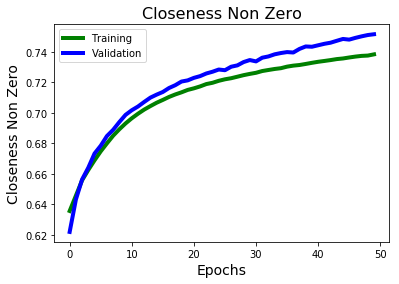

In [16]:
plt.plot(hist_2280_1140['closeness_non_zero'], lw=4, label='Training', c='green')
plt.plot(hist_2280_1140['val_closeness_non_zero'], lw=4, label='Validation', c='blue')
plt.xlabel('Epochs', size=14)
plt.ylabel('Closeness Non Zero', size=14)
plt.title('Closeness Non Zero', size=16)
plt.legend()
plt.show()

##### Notice that the validation and training are on top of each other

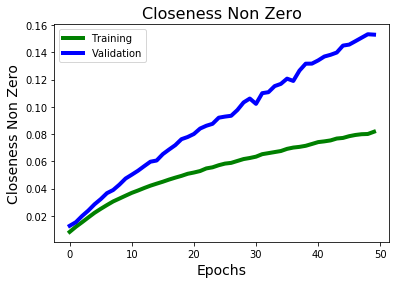

In [17]:
plt.plot(hist_2280_1140['non_zero'], lw=4, label='Training', c='green')
plt.plot(hist_2280_1140['val_non_zero'], lw=4, label='Validation', c='blue')
plt.xlabel('Epochs', size=14)
plt.ylabel('Closeness Non Zero', size=14)
plt.title('Closeness Non Zero', size=16)
plt.legend()
plt.show()

### Comparing various models

In [59]:
hist_2280_1140_path = os.path.join('Model_histories', 'history_basic_auto_adadelta_mse_(2280, 1140, 2280)_time')
hist_2280_570_path = os.path.join('Model_histories', 'history_basic_auto_adadelta_mse_(2280, 570, 2280)_time')
hist_1140_285_path = os.path.join('Model_histories','history_basic_auto_adadelta_mse_(1140, 285, 1140)_time' )

with open(hist_2280_1140_path, 'rb') as file:
    hist_2280_1140 = pickle.load(file)
with open(hist_2280_570_path, 'rb') as file:
    hist_2280_570 = pickle.load(file)
with open(hist_1140_285_path, 'rb') as file:
    hist_1140_285 = pickle.load(file)

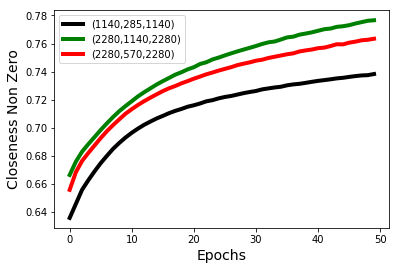

In [60]:
plt.plot(hist_1140_285['closeness_non_zero'], lw=4, label='(1140,285,1140)', c='black')
plt.plot(hist_2280_1140['closeness_non_zero'], lw=4, label='(2280,1140,2280)', c='green')
plt.plot(hist_2280_570['closeness_non_zero'], lw=4, label='(2280,570,2280)', c='red')
plt.legend()
plt.xlabel('Epochs', size=14)
plt.ylabel('Closeness Non Zero', size=14)
plt.show()

## Different plot styles

### Seaborn

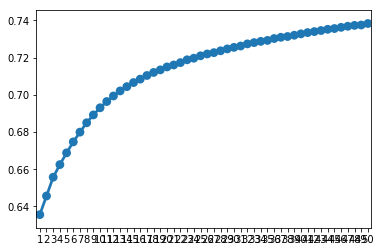

In [67]:
epochs = np.arange(1,51)
ax = sns.pointplot(x=epochs, y=hist_1140_285['closeness_non_zero'])

### Plotly

In [72]:
max(hist_2280_570['loss'])

0.35523456392773217

### Getting stats for lstm 

In [68]:
lstm_path = os.path.join('Model_histories', 'history_Recurrent_extraction_mse_adadelta_SC_0.125')

with open(lstm_path, 'rb') as file:
    hist_lstm = pickle.load(file)

In [69]:
min(hist_lstm['loss'])

0.4738367885404453